# Raster Data Processing Using Python

# Raster Data

Raster data represent objects/variables on the Earth's surface as a matrix of values, in the form of pixels, cells, or grids

<B>Layers and bands</B>

A raster is an image with a matrix of values representing the values of some observed attribute. Bands of a raster correspond to different variables, usually using the same matrix structure.

Example: Spatial variability of temperature, elevation, rainfall, etc. over a region.

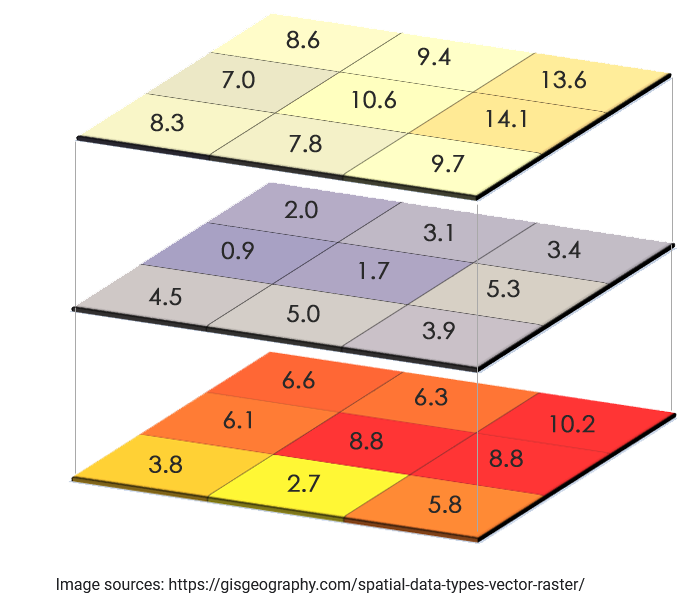

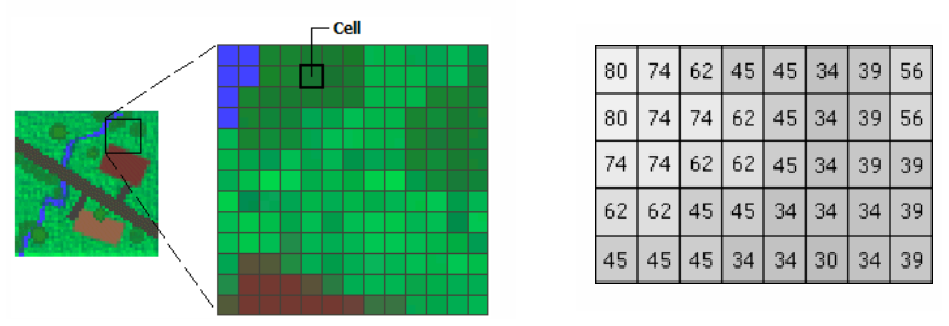

# Raster Bands

Some rasters have a single band, of data, while others have multiple bands. Basically, a band is represented by a single matrix of cell values, and a raster with multiple bands contains multiple spatially coincident matrices of cell values representing the same spatial area. An example of a single-band raster dataset is a digital elevation model (DEM). Each cell in a DEM contains only one value representing surface elevation.

# Single band raster

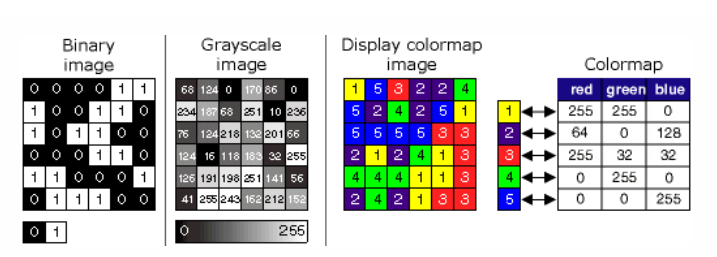

# Multi band Raster

A satellite image, for example, commonly has multiple bands representing different wavelengths from the ultraviolet through the visible and infrared portions of the electromagnetic spectrum

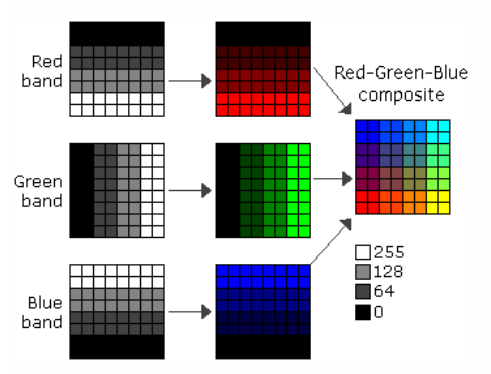

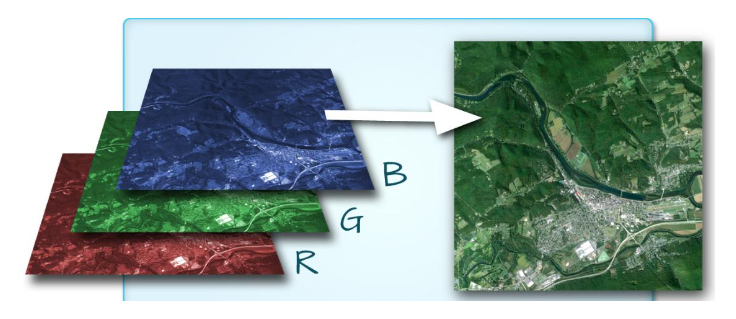

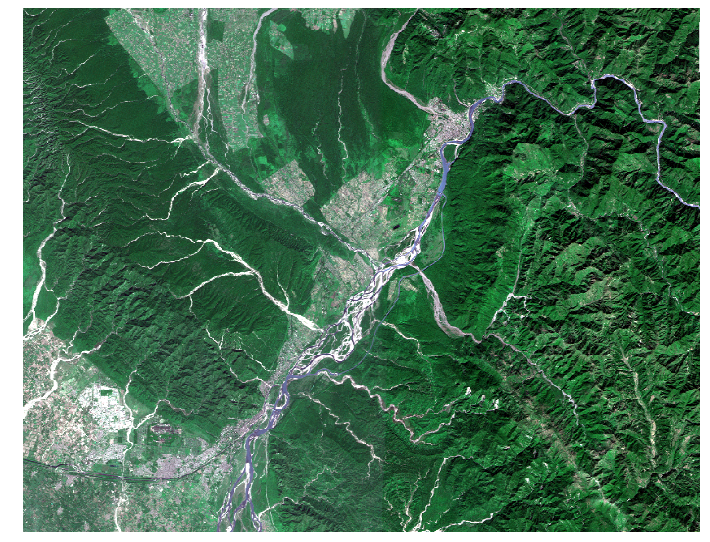![image.png](attachment:image.png)

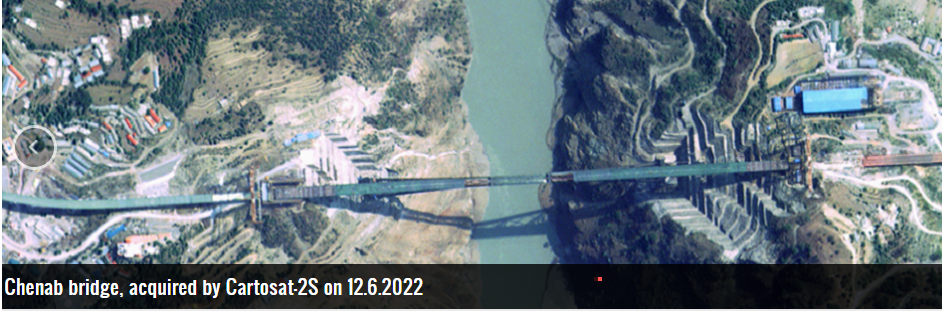

Image Credits
<UL>
<LI>Google Earth Engine https://earthengine.google.com/
<LI>ARC GIS https://pro.arcgis.com/
Geoprocessing with Python By Chris Garrad https://www.manning.com/books/geoprocessing-with-python

# Introduction to GDAL

The Geospatial Data Abstraction Library (GDAL) is a translator library for raster and vector geospatial data formats <br />
GDAL is a computer software library for reading and writing raster and vector geospatial data format.<br />
GDAL presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formats.<br />
GDAL also comes with a variety of useful command line utilities for data translation and processing<br />


# Advantages of GDAL

<ul>
<li>Free and Open Source (https://github.com/OSGeo/gdal).</li>
<li>Support for over 80+ Image formats and map projections.</li>
<li>Command line as well as C/C++/Python/R/Java API.</li>
<li>Used extensively by worlds large geospatial data services.</li>
<li>Extensive test suite and active developer community.</li>
<li>GDAL also includes extensive support for vector datasets</li>
</ul>

# GDAL Raster Data Model
<ul>
<li>A dataset (represented by the  `GDALDataset` class) is an assembly of related raster bands and some information common to them all
<li>A dataset has a concept of the raster size (in pixels and lines)
<li>A dataset is also responsible for the georeferencing transform and coordinate system definition of all bands
<li>A dataset itself can also have associated metadata, a list of name/value pairs in string form.

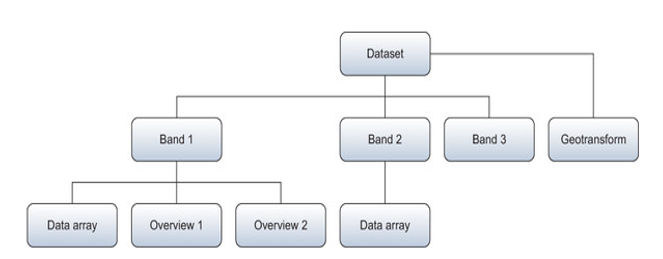

# Map Projection

A map projection is a way to flatten a earths's surface into a plane in order to make a map. This requires a systematic transformation of the latitudes and longitudes of locations from the surface of the globe into locations on a plane. All projections of a sphere on a plane necessarily distort the surface in some way and to some extent

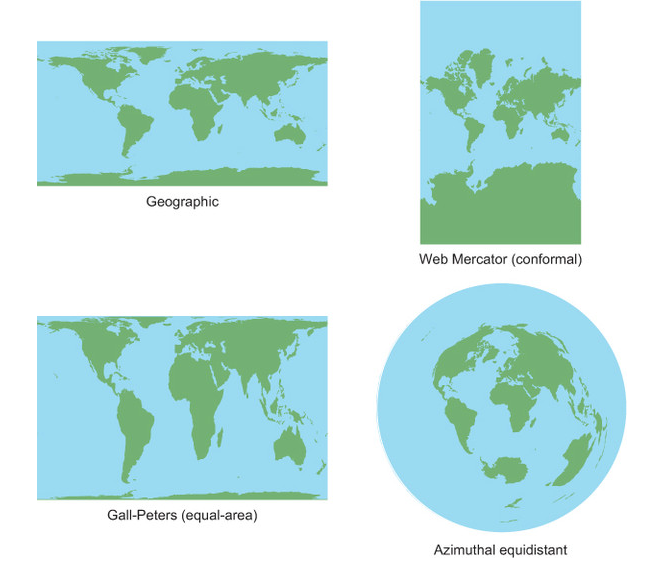![image.png](attachment:image.png)

# Coordinate System

There are numerous conventions used globally for representing the coordinate system for map data


Dataset coordinate systems are represented as OpenGIS Well Known Text strings. This can contain
<li>An overall coordinate system name.
<li>A geographic coordinate system name.
<li>A datum identifier.
<li>An ellipsoid name, semi-major axis, and inverse flattening.
<li>A prime meridian name and offset from Greenwich.
<li>A projection method type (i.e. Transverse Mercator).
<li>A list of projection parameters (i.e. central_meridian).
<li>A units name, and conversion factor to meters or radians.
<li>Names and ordering for the axes.
<li>Codes for most of the above in terms of predefined coordinate systems from authorities such as EPSG.

<ol>
<li>PROJ4 - https://proj4.org/usage/projections.html
<li>OGC WKT (defacto standard) - http://docs.opengeospatial.org/is/12-063r5/12-063r5.html
<li>EPSG codes (Easy to use) - http://spatialreference.org/ref/epsg/
<li>XML etc
</ol>


# Coordinate of Image

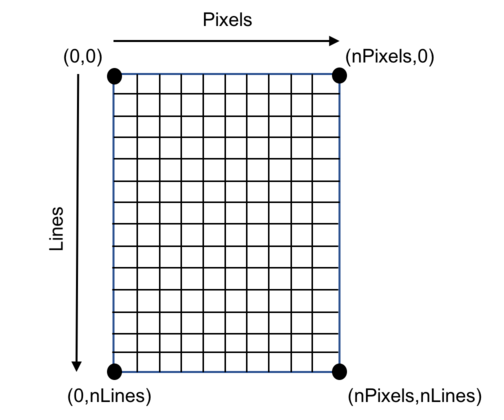bold text![image.png](attachment:image.png)

# Pixel Line to Real Coordinate

A geotransform is an affine transformation from the image coordinate space (row, column), also known as (pixel, line) to the georeferenced coordinate space (projected or geographic coordinates)

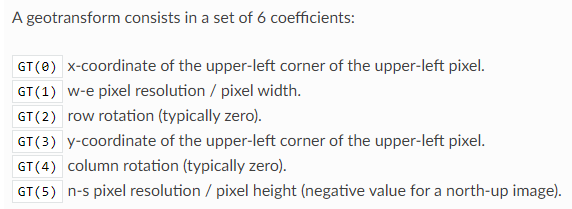

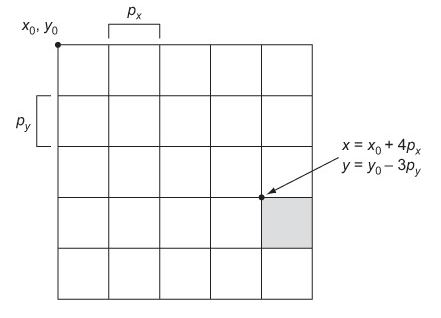

## Transformation from image coordinate space to georeferenced coordinate space

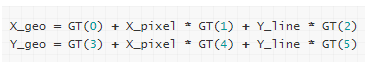

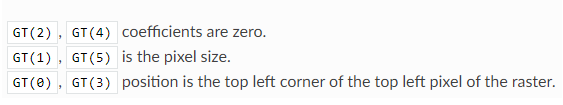

# Getting Raster Information with Python

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import os
from osgeo import osr
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML, display
from pprint import pprint

In [ ]:
os.chdir(r'G:\156Geoprocessing\Lectures\DLP_Data-20250217T112909Z-001\DLP_Data')

In [ ]:
file_name = 'haridwar.tif'

In [ ]:
raster_info = gdal.Info(file_name, format='json')

In [ ]:
pprint(raster_info)

In [ ]:
ds = gdal.Open(file_name)
ds

In [ ]:
print('File list:', ds.GetFileList())

In [ ]:
print('Width:', ds.RasterXSize)

In [ ]:
print('Height:', ds.RasterYSize)

In [ ]:
print('Coordinate system:', ds.GetProjection())

In [ ]:
gt = ds.GetGeoTransform()
gt

In [ ]:
print('Origin:', (gt[0], gt[3]))
print('Pixel size:', (gt[1], gt[5]))

In [ ]:
print('Upper Left Corner:', gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:', gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:',gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:', gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

In [ ]:
print('Metadata:', ds.GetMetadata())

In [ ]:
print('Number of bands:', ds.RasterCount)

In [ ]:
for i in range(1, ds.RasterCount+1):
    band = ds.GetRasterBand(i) # in GDAL, band are indexed starting at 1!
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w,h)=band.GetBlockSize()
    print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i,w,h,interp_name))
    ovr_count = band.GetOverviewCount()
    for j in range(ovr_count):
        ovr_band = band.GetOverview(j) # but overview bands starting at 0
        print(' Overview %d: %dx%d'%(j, ovr_band.XSize, ovr_band.YSize))

In [ ]:
del ds

In [ ]:
ds = gdal.Open(file_name)

In [ ]:
for i in range(1,ds.RasterCount+1):
    band = ds.GetRasterBand(i)
    (minimum, maximum, mean, stddev) = band.ComputeStatistics(False)
    print('Band{:d}, min={:.3f}, max={:.3f},mean={:.3f},stddev={:.3f}'.format(i, minimum, maximum, mean, stddev))

In [ ]:
band = ds.GetRasterBand(1)


In [ ]:
data = band.ReadAsArray()

In [ ]:
data

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data,cmap='gray')

In [ ]:
plt.figure(figsize=(10,15))
for i in range(1,ds.RasterCount+1):
    band = ds.GetRasterBand(i)
    plt.subplot(3,1,i)
    plt.title('Band:'+str(i+1))
    plt.imshow(band.ReadAsArray(),cmap='gray')
    plt.tight_layout()

In [ ]:
plt.close()

#  Visualise MultiBand Raster
Though there are many possible combinations of wavelength bands, the Earth Observatory typically selects  combinations based on the event or feature we want to illustrate.</br>
For instance, floods are best viewed in shortwave infrared, near infrared, and green light because muddy water blends with brown land in a natural color image.</br> Shortwave infrared light highlights the difference between clouds, ice, and snow, all of which are white in visible light.

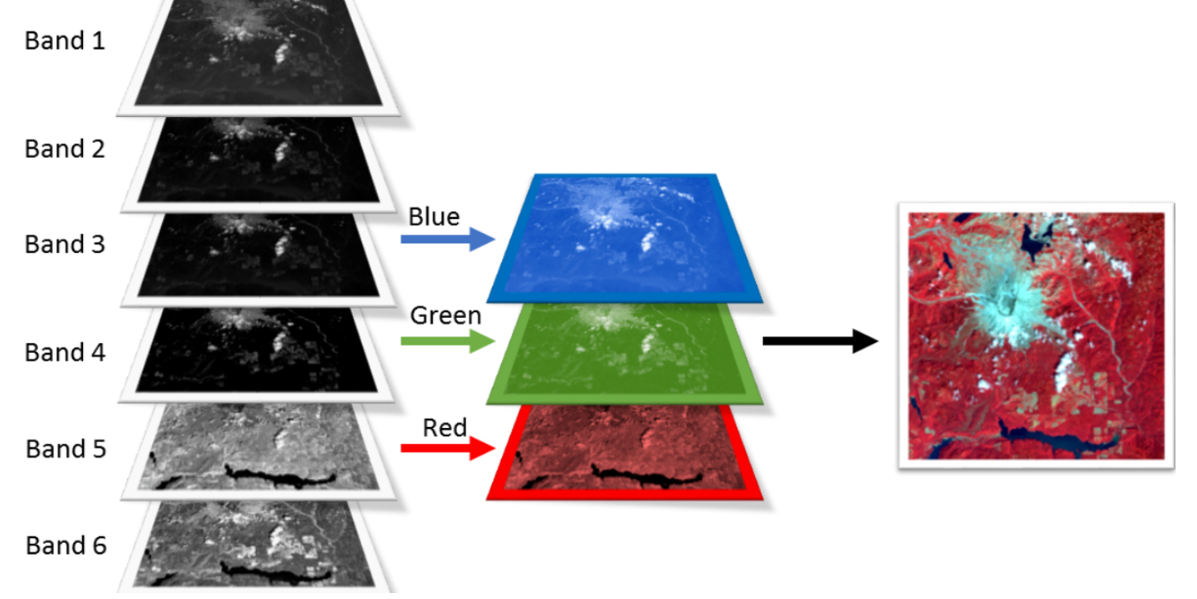

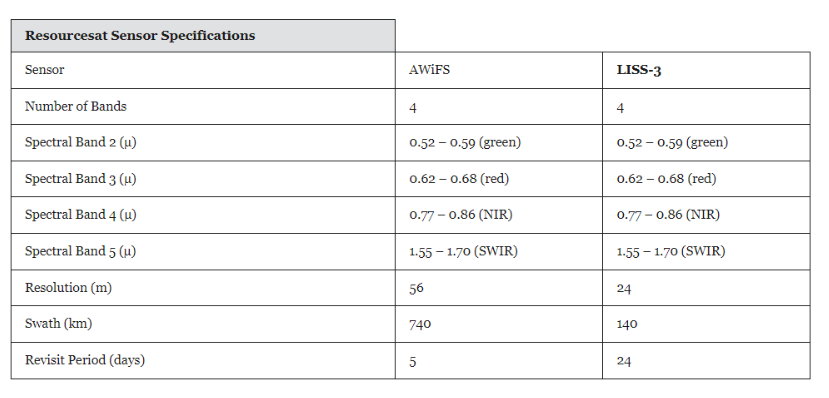![image.png](attachment:image.png)

##  False Color Composite
<ol>
<li>Near infrared (red), green (blue), red (green). This is a traditional band combination useful in seeing changes in plant health.
<li>Shortwave infrared (red), near infrared (green), and green (blue), often used to show floods or newly burned land.
<li>Blue (red), two different shortwave infrared bands (green and blue). We use this to differentiate between snow, ice, and clouds.
<li>Thermal infrared, usually shown in tones of gray to illustrate temperature.
</ol>

## Standard False Color Composites

Near infrared (red), red (green),  green (blue)<br>


In [ ]:
multi_data = ds.ReadAsArray(band_list=[3, 2, 1])

In [ ]:
multi_data[0]

In [ ]:
multi_data = np.transpose(multi_data, axes=(1, 2, 0))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multi_data)

In this case, plants reflect near infrared and green light, while absorbing red. Since they reflect more near infrared than green, plant-covered land appears deep red.<br>
Cities and exposed ground are gray or tan, and clear water is black. This band combination is valuable for gauging plant health.

In [ ]:
plt.close()

##  False Color Composites

Shortwave infrared (red), near infrared (green), and green (blue)

In [ ]:
multi_data = ds.ReadAsArray(band_list=[2, 3, 1])

In [ ]:
multi_data = np.transpose(multi_data, axes=(1, 2, 0))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multi_data)

In [ ]:
multi_data = ds.ReadAsArray(band_list=[1 ,2, 3])

In [ ]:
multi_data = np.transpose(multi_data, axes=(1, 2, 0))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(multi_data)

In [ ]:
plt.close()

# Reading Partial Data set

In [ ]:
band = ds.GetRasterBand(1)

In [ ]:
data=band.ReadAsArray(xoff=600, yoff=600,win_xsize=512,win_ysize=512)

In [ ]:
data.shape

In [ ]:
plt.imshow(data,cmap='gray')

In [ ]:
del data
del ds

# Reading HDF Data

Hierarchical Data Format (HDF) is a data file format designed by the National Center for Supercomputing Applications (NCSA) to assist users in the storage and manipulation of scientific data across diverse operating systems and machines.   
HDF5 files consist of a directory and a collection of data objects. Every data object has a directory entry, containing a pointer to the data object location, and information defining the datatype.  
HDF supports a variety of data types: scientific data arrays, tables, and text annotations, as well as several types of raster images and their associated color palettes.     
There are two distinct varieties of HDF, known as HDF (version 4 and earlier) and the newer HDF5.


HDF files are also self-describing. For each data object in an HDF file, there are predefined tags that
identify such information as the type of data, the amount of data, its dimensions, and its location in
the file. The self-describing capability of HDF files has important implications for processing scientific
data. It makes it possible to fully understand the structure and contents of a file just from the
information stored in the file itself

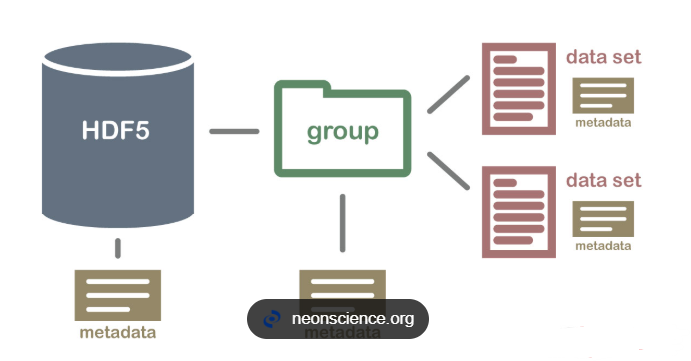

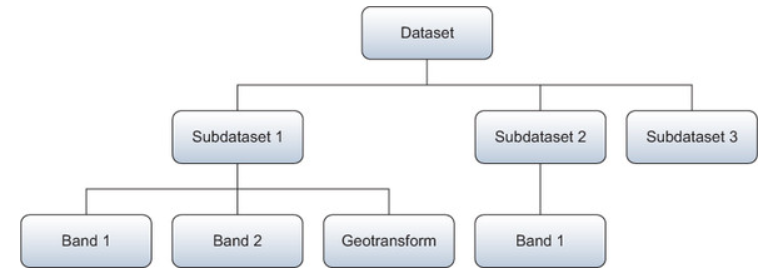

In [ ]:
hdf_file = 'MOD09GA.A2025001.h25v06.061.2025003041337.hdf'

In [ ]:
ds = gdal.Open(hdf_file)

In [ ]:
sds = ds.GetSubDatasets()

In [ ]:
for sds_file, description in sds:
  print(description, sds_file)

[1200x1200] num_observations_1km MODIS_Grid_1km_2D (8-bit integer) HDF4_EOS:EOS_GRID:"MOD09GA.A2025001.h25v06.061.2025003041337.hdf":MODIS_Grid_1km_2D:num_observations_1km
[1200x1200] state_1km_1 MODIS_Grid_1km_2D (16-bit unsigned integer) HDF4_EOS:EOS_GRID:"MOD09GA.A2025001.h25v06.061.2025003041337.hdf":MODIS_Grid_1km_2D:state_1km_1
[1200x1200] SensorZenith_1 MODIS_Grid_1km_2D (16-bit integer) HDF4_EOS:EOS_GRID:"MOD09GA.A2025001.h25v06.061.2025003041337.hdf":MODIS_Grid_1km_2D:SensorZenith_1
[1200x1200] SensorAzimuth_1 MODIS_Grid_1km_2D (16-bit integer) HDF4_EOS:EOS_GRID:"MOD09GA.A2025001.h25v06.061.2025003041337.hdf":MODIS_Grid_1km_2D:SensorAzimuth_1
[1200x1200] Range_1 MODIS_Grid_1km_2D (16-bit unsigned integer) HDF4_EOS:EOS_GRID:"MOD09GA.A2025001.h25v06.061.2025003041337.hdf":MODIS_Grid_1km_2D:Range_1
[1200x1200] SolarZenith_1 MODIS_Grid_1km_2D (16-bit integer) HDF4_EOS:EOS_GRID:"MOD09GA.A2025001.h25v06.061.2025003041337.hdf":MODIS_Grid_1km_2D:SolarZenith_1
[1200x1200] SolarAzimuth_

In [ ]:
pprint(ds.GetMetadata())

{'ADDITIONALLAYERS1KM': '6',
 'ADDITIONALLAYERS500M': '0',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'No automatic quality assessment is '
                                      'performed in the PGE',
 'CHARACTERISTICBINANGULARSIZE1KM': '30.0',
 'CHARACTERISTICBINANGULARSIZE500M': '15.0',
 'CHARACTERISTICBINSIZE1KM': '926.625433055556',
 'CHARACTERISTICBINSIZE500M': '463.312716527778',
 'CLOUDOPTION': 'MOD09 internally-derived',
 'COVERAGECALCULATIONMETHOD': 'volume',
 'COVERAGEMINIMUM': '0.00999999977648258',
 'DATACOLUMNS1KM': '1200',
 'DATACOLUMNS500M': '2400',
 'DATAROWS1KM': '1200',
 'DATAROWS500M': '2400',
 'DAYNIGHTFLAG': 'Day',
 'DEEPOCEANFLAG': 'Yes',
 'DESCRREVISION': '6.1',
 'EASTBOUNDINGCOORDINATE': '92.3856655640221',
 'EQUATORCROSSINGDATE.1': '2025-01-01',
 'EQUATORCROSSINGDATE.2': '2025-01-01',
 'EQUATORCROSSING

In [ ]:
red_band = gdal.Open(sds[11][0])
blue_band = gdal.Open(sds[14][0])
green_band = gdal.Open(sds[13][0])

In [ ]:
pprint(red_band.GetMetadata())

{'ADDITIONALLAYERS1KM': '6',
 'ADDITIONALLAYERS500M': '0',
 'ASSOCIATEDINSTRUMENTSHORTNAME.1': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME.1': 'Terra',
 'ASSOCIATEDSENSORSHORTNAME.1': 'MODIS',
 'AUTOMATICQUALITYFLAG.1': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION.1': 'No automatic quality assessment is '
                                      'performed in the PGE',
 'CHARACTERISTICBINANGULARSIZE1KM': '30.0',
 'CHARACTERISTICBINANGULARSIZE500M': '15.0',
 'CHARACTERISTICBINSIZE1KM': '926.625433055556',
 'CHARACTERISTICBINSIZE500M': '463.312716527778',
 'CLOUDOPTION': 'MOD09 internally-derived',
 'COVERAGECALCULATIONMETHOD': 'volume',
 'COVERAGEMINIMUM': '0.00999999977648258',
 'DATACOLUMNS1KM': '1200',
 'DATACOLUMNS500M': '2400',
 'DATAROWS1KM': '1200',
 'DATAROWS500M': '2400',
 'DAYNIGHTFLAG': 'Day',
 'DEEPOCEANFLAG': 'Yes',
 'DESCRREVISION': '6.1',
 'EASTBOUNDINGCOORDINATE': '92.3856655640221',
 'EQUATORCROSSINGDATE.1': '2025-01-01',
 'EQUATORCROSSINGDATE.2': '2025-01-01',
 'EQUATORCROSSING

In [ ]:
red_data = red_band.ReadAsArray() * 0.0001
blue_data = blue_band.ReadAsArray() * 0.0001
green_data = green_band.ReadAsArray()* 0.0001

In [ ]:
rbg_data = np.stack((red_data, green_data, blue_data), axis=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8672..1.6].


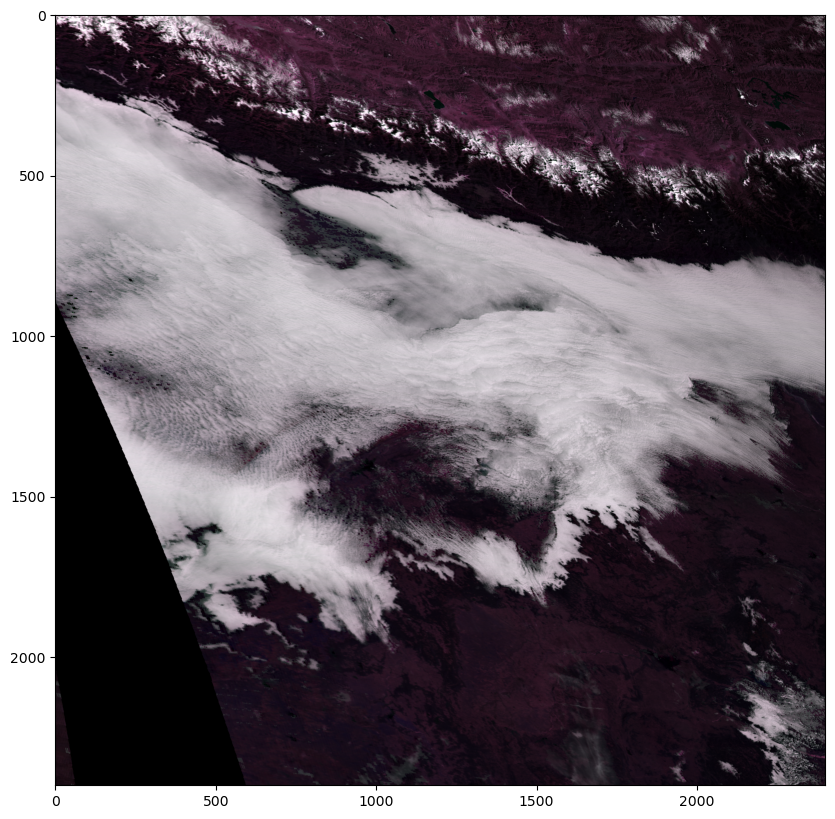

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(rbg_data)

# Reading netCDF Data

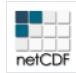

NetCDF (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction. Each of these variables can be displayed through a dimension (such as time)

Data in netCDF format is:

**Self-Describing.** A netCDF file includes information about the data it contains.  
**Portable**. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.  
**Scalable.** Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.  
**Appendable**. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
Sharable. One writer and multiple readers may simultaneously access the same netCDF file.  
**Archivable.** Access to all earlier forms of netCDF data will be supported by current and future versions of the software.

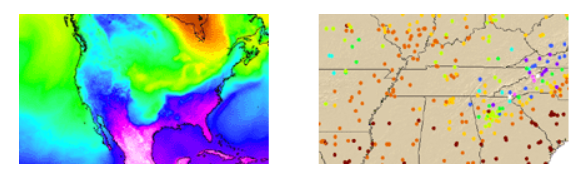

In [ ]:
file_name = 'SAC_WRF_FCST_5KM_20250123.nc'

In [ ]:
info = gdal.Info(file_name, format='json')

In [ ]:
pprint(info)

{'bands': [],
 'cornerCoordinates': {'center': [256.0, 256.0],
                       'lowerLeft': [0.0, 512.0],
                       'lowerRight': [512.0, 512.0],
                       'upperLeft': [0.0, 0.0],
                       'upperRight': [512.0, 0.0]},
 'description': 'SAC_WRF_FCST_5KM_20250123.nc',
 'driverLongName': 'Network Common Data Format',
 'driverShortName': 'netCDF',
 'extent': {'coordinates': [[]], 'type': 'Polygon'},
 'files': ['SAC_WRF_FCST_5KM_20250123.nc'],
 'metadata': {'': {'NC_GLOBAL#CDI': 'Climate Data Interface version 1.7.0 '
                                    '(http://mpimet.mpg.de/cdi)',
                   'NC_GLOBAL#CDO': 'Climate Data Operators version 1.7.0 '
                                    '(http://mpimet.mpg.de/cdo)',
                   'NC_GLOBAL#Conventions': 'CF-1.4',
                   'NC_GLOBAL#history': 'Thu Jan 23 10:27:46 2025: cdo '
                                        'select,name=t2,psfc,rainc,rainnc,clflo,clfmi,clfhi,rh2,ws1

In [ ]:
temp_info = gdal.Info('NETCDF:"/content/drive/MyDrive/DLP_Data/SAC_WRF_FCST_5KM_20250123.nc":t2')

In [ ]:
pprint(temp_info)

In [ ]:
ds = gdal.OpenEx(file_name, gdal.OF_MULTIDIM_RASTER)

In [ ]:
rootGroup = ds.GetRootGroup()

In [ ]:
rootGroup.GetMDArrayNames()

['lon',
 'lat',
 'lev_2',
 'time',
 't2',
 'psfc',
 'rainc',
 'rainnc',
 'clflo',
 'clfmi',
 'clfhi',
 'rh2',
 'ws10',
 'wd10']

In [ ]:
temperature = rootGroup.OpenMDArray("t2")
data = temperature.ReadAsArray()

In [ ]:
data.shape

(25, 1, 900, 900)

In [ ]:
data = data.squeeze() - 273

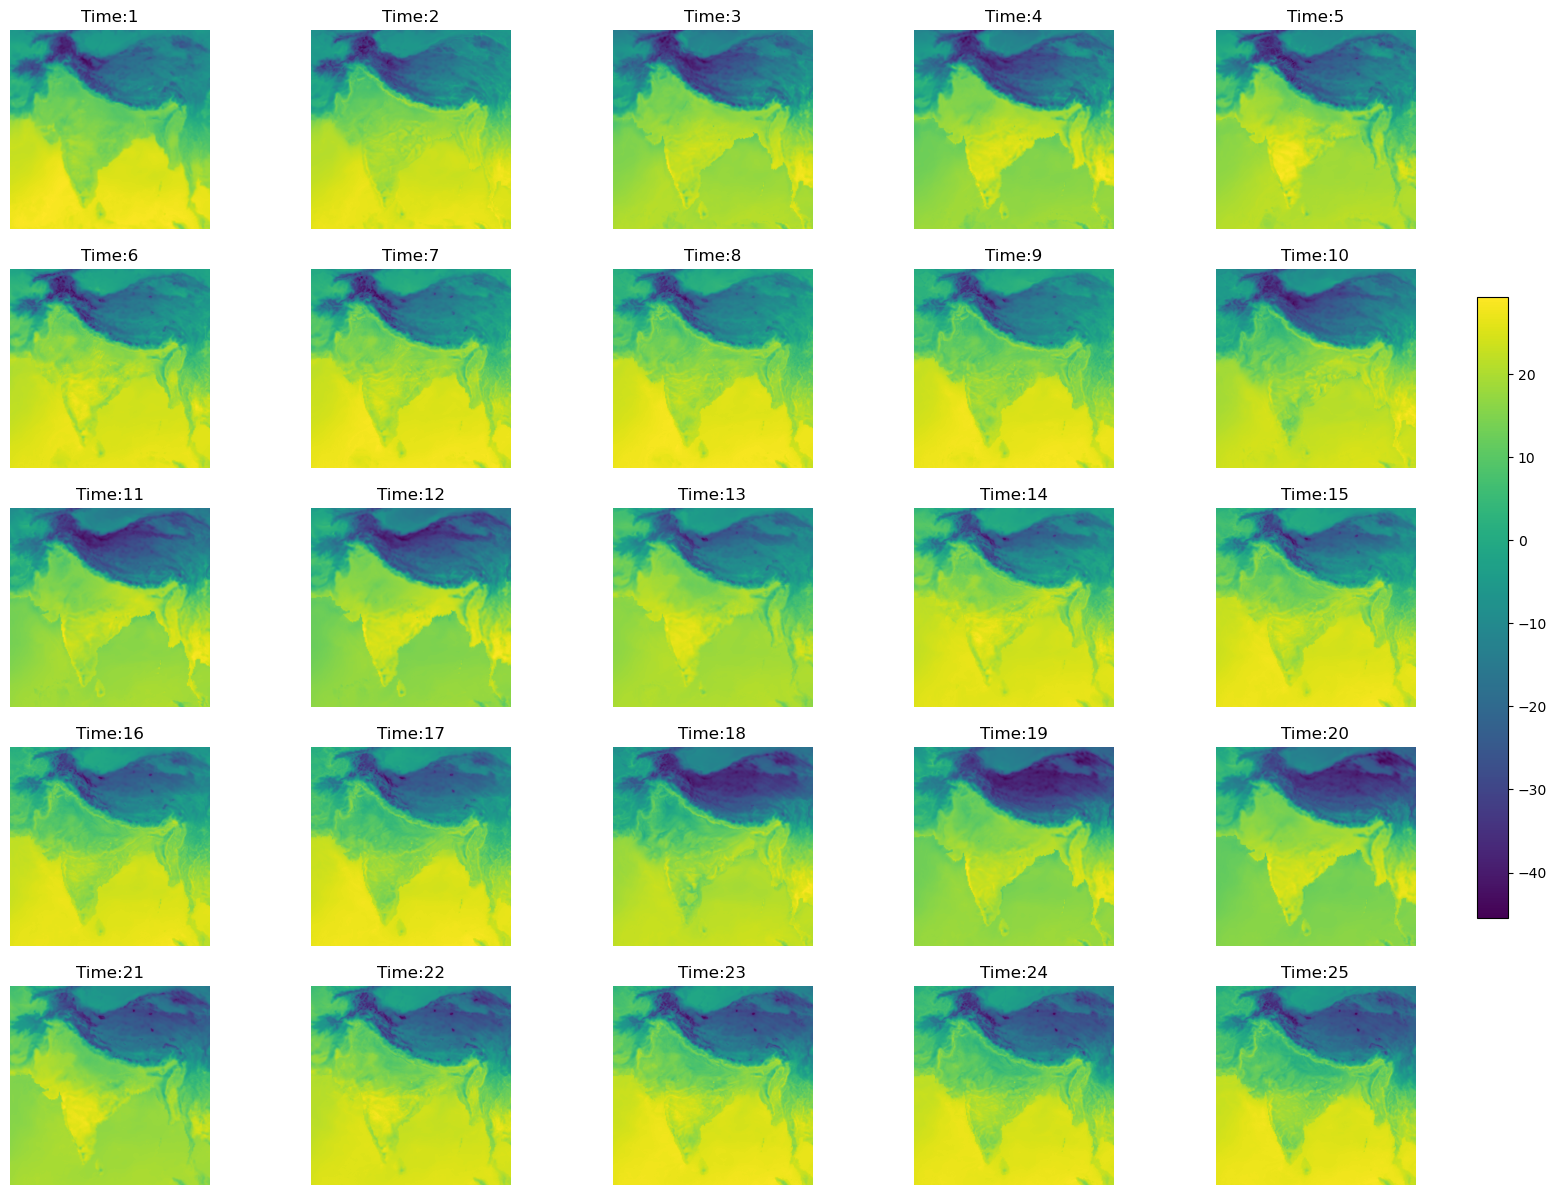

In [ ]:
fig = plt.figure(figsize=(20,15))
for i in range(1,len(data)+1):
    plt.subplot(5, 5, i)
    plt.title('Time:'+str(i))
    im  = plt.imshow(data[i-1].squeeze(), origin='lower')
    plt.axis('off')
cbar = fig.colorbar(im, ax=fig.get_axes(), orientation='vertical', fraction=0.02, pad=0.04)
#plt.tight_layout()
plt.show()

In [ ]:
plt.close()

# Thank You

In [ ]:
import os
from osgeo import gdal

In [ ]:
os.chdir('/content/drive/MyDrive/DLP_Data')

In [ ]:
ds = gdal.Open('BAND2.tif')

In [ ]:
driver = gdal.GetDriverByName('gtiff')

In [ ]:
h,w = ds.RasterYSize, ds.RasterXSize

In [ ]:
data = ds.ReadAsArray()

In [ ]:
data.dtype

In [ ]:
dst_ds = driver.Create('haridwar.tif', xsize=w, ysize=h, bands=3,eType=gdal.GDT_UInt16)

In [ ]:
dst_ds.SetProjection(ds.GetProjection())
dst_ds.SetGeoTransform(ds.GetGeoTransform())
for i in range(2, 5):
  #print(f'BAND{i-2}')
  dss = gdal.Open(f'BAND{i}.tif')
  dst_ds.GetRasterBand(i-1).WriteArray(dss.ReadAsArray())
  del dss

In [ ]:
dst_ds.BuildOverviews('AVERAGE', [2, 4, 8])

In [ ]:
dst_ds.FlushCache()

In [ ]:
del dst_ds